ITEC610 Assessment Task 3 - Daniella Asima (S00360524)

In [ ]:
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/content/assessment3_data_brfss.csv')

TAsk1 | Produce a summary statistics graph

,weight2,wtyrago,htm3
count,398484.000000,390399.000000,409129.000000
mean,78.992337,79.721319,168.825190
std,19.546212,20.565164,10.352653
min,20.000000,22.727273,61.000000
25%,64.545455,64.545455,160.000000
50%,77.272727,77.272727,168.000000
75%,90.909091,90.909091,175.000000
max,309.090909,342.272727,236.000000


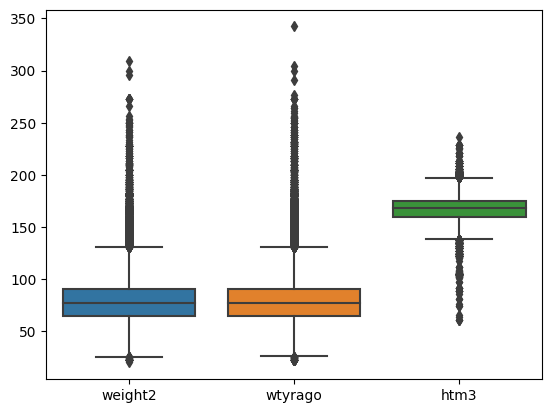

In [ ]:
# Task 1: Summary statistics graph
sns.boxplot(data=data[['weight2', 'wtyrago', 'htm3']])
summary_stats = data[['weight2', 'wtyrago', 'htm3']].describe()
summary_stats

this produces a statistucs graph for the data set and the specified columns

Task 2 | Calculate correlation

In [ ]:
# Defiining weight_change
weight = data['weight2']
weight_a_year_ago = data['wtyrago']
height = data['htm3']
weight_change = weight - weight_a_year_ago

#add the 'weight_change' data into the dataframe as a column on its own. For propoer usage
data['weight_change'] = data['weight2'] - data['wtyrago']

In [ ]:
weight_change.corr(data['age'])

-0.06902704446724107

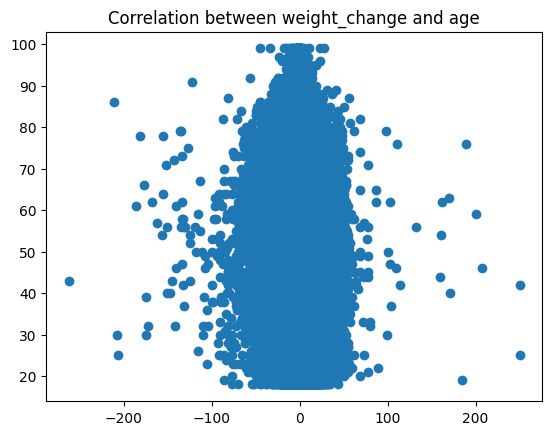

In [ ]:
plt.scatter(weight_change, data['age'])
plt.title(f'Correlation between weight_change and age')
plt.show()

In [ ]:
weight_change.corr(data['weight2'])

0.03521533150974809

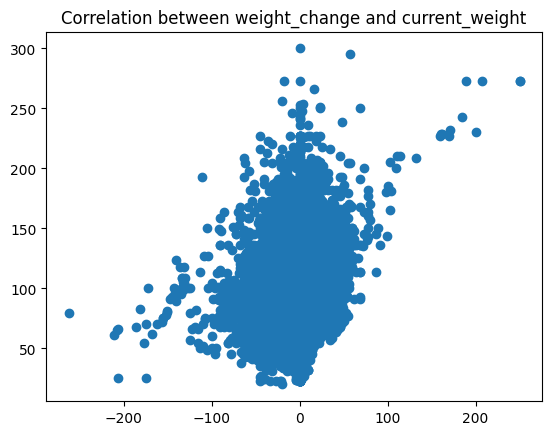

In [ ]:
plt.scatter(weight_change, data['weight2'])
plt.title(f'Correlation between weight_change and current_weight')
plt.show()

In [ ]:
weight_change.corr(data['wtyrago'])

-0.31881230471173766

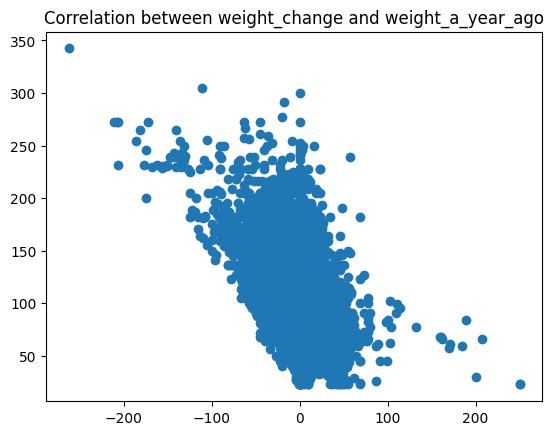

In [ ]:
plt.scatter(weight_change, data['wtyrago'])
plt.title(f'Correlation between weight_change and weight_a_year_ago')
plt.show()

From the various correlation diagrams, it shows that the weight_change is more correlated to the current_weight

Task 3

Task3a 1 Using t-test to test significant difference

In [ ]:
# Select the columns to use
from scipy.stats import ttest_ind

# Select weight change data for male and female subjects
male_weight_change = data.loc[data['sex'] == 1, 'weight_change'].dropna()
female_weight_change = data.loc[data['sex'] == 2, 'weight_change'].dropna()

# Perform t-test for difference in weight change between male and female subjects
ttest_result = ttest_ind(male_weight_change, female_weight_change)

# Print the p-value of the t-test
ttest_result.pvalue

1.591286404080411e-14

a p=values of probability value of 1.591286404080411e-14 means that the probability of observing the observed difference in weight change between male and female subjects by chance if there is no true difference between the populations is extremely low

Task3a 2 Randomy splitting  ro roughly equal sizes

In [ ]:
# Randomly split the subjects into two groups
group1 = data.sample(frac=0.5, random_state=1)
group2 = data.drop(group1.index)

# Select weight change data for the two groups
group1_weight_change = group1['weight_change'].dropna()
group2_weight_change = group2['weight_change'].dropna()

# Perform t-test for difference in weight change between the two groups
ttest_result = ttest_ind(group1_weight_change, group2_weight_change)

# Print the p-value of the t-test
print(ttest_result.pvalue)

0.07317675252736272


this show a probabilty value of 0.073 indicating that it has a lower probability rate

Task3a 3 |   Repeat task 3a2 1000 times and plot -log10 P values

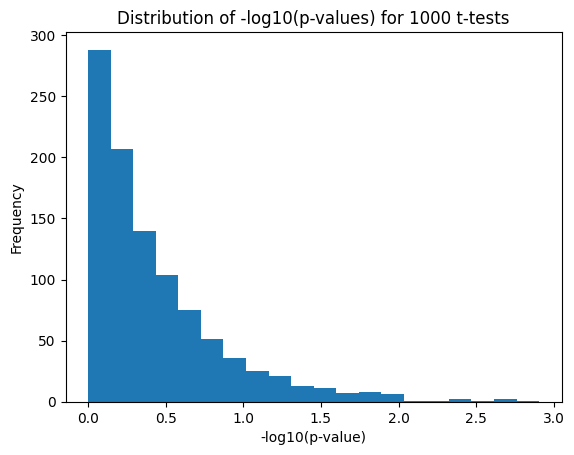

In [ ]:
# Define the number of repetitions
n_reps = 1000

# Initialize an array to store the -log10(p-values)
p_values = np.zeros(n_reps)

# Repeat the process of randomly splitting the data and performing a t-test
for i in range(n_reps):
    # Randomly split the subjects into two groups
    group1 = data.sample(frac=0.5, random_state=i)
    group2 = data.drop(group1.index)

    # Select weight change data for the two groups
    group1_weight_change = group1['weight_change'].dropna()
    group2_weight_change = group2['weight_change'].dropna()

    # Perform t-test for difference in weight change between the two groups
    ttest_result = ttest_ind(group1_weight_change, group2_weight_change)

    # Store the -log10(p-value)
    p_values[i] = -np.log10(ttest_result.pvalue)

# Plot the distribution of the -log10(p-values)
plt.hist(p_values, bins=20)
plt.xlabel('-log10(p-value)')
plt.ylabel('Frequency')
plt.title('Distribution of -log10(p-values) for 1000 t-tests')
plt.show()

Task3a 4 | calculating the weight_height_ratio and using ttest to test for significant difference between male and female heights

In [ ]:
# Calculate weight-height ratio
data['weight_height_ratio'] = data['weight2'] / (data['htm3'] / 100)

# Select weight-height ratio data for males and females
male_data = data.loc[data['sex'] == 1, 'weight_height_ratio'].dropna()
female_data = data.loc[data['sex'] == 2, 'weight_height_ratio'].dropna()

# Perform t-test for difference in weight-height ratio between males and females
ttest_result = ttest_ind(male_data, female_data)

# Print the t-test result
print("The t-statistic is {:.2f} and the p-value is {:.2e}.".format(ttest_result.statistic, ttest_result.pvalue))

The t-statistic is 165.16 and the p-value is 0.00e+00.


Task3a 5.| Repeat the analysis you did in 3.4, but replace weight_height_ratio with weight_change in your analysis.

In [ ]:

# Calculate weight change
data['weight_change'] = data['weight2'] - data['wtyrago']

# Select weight change data for males and females
male_data = data.loc[data['sex'] == 1, 'weight_change'].dropna()
female_data = data.loc[data['sex'] == 2, 'weight_change'].dropna()

# Perform t-test for difference in weight change between males and females
ttest_result = ttest_ind(male_data, female_data)

# Print the t-test result
print("The t-statistic is {:.2f} and the p-value is {:.2e}.".format(ttest_result.statistic, ttest_result.pvalue))

The t-statistic is -7.68 and the p-value is 1.59e-14.


The t-test result indicates that there is a significant difference between the weight change of males and females in the dataset, with a negative t-statistic of -7.68 and a very small p-value of 1.59e-14. This suggests that the weight change of females is, on average, significantly greater than that of males